In [35]:
from tensorflow.keras.datasets import mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [37]:
x_train, x_test = x_train/255.0, x_test / 255.0
x_train = x_train.reshape((x_train.shape[0], 28*28))
x_test = x_test.reshape((x_test.shape[0], 28*28))
logreg  = LogisticRegression(max_iter = 100)
logreg.fit(x_train,y_train)
y_pred_logreg = logreg.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("logreg", accuracy_logreg)

logreg 0.9258


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_logreg)
confusion

array([[ 959,    0,    0,    3,    1,    7,    5,    4,    1,    0],
       [   0, 1111,    4,    2,    0,    2,    3,    2,   11,    0],
       [   6,    9,  926,   16,    9,    4,   13,    6,   39,    4],
       [   4,    1,   18,  917,    1,   22,    4,   11,   25,    7],
       [   1,    1,    7,    3,  914,    0,   10,    4,   10,   32],
       [  10,    2,    3,   34,    7,  783,   14,    6,   29,    4],
       [   9,    3,    8,    2,    7,   14,  912,    2,    1,    0],
       [   1,    8,   23,    6,    7,    1,    0,  950,    3,   29],
       [   9,   11,    8,   23,    7,   25,   12,    7,  861,   11],
       [   9,    8,    0,   11,   24,    6,    0,   19,    7,  925]])

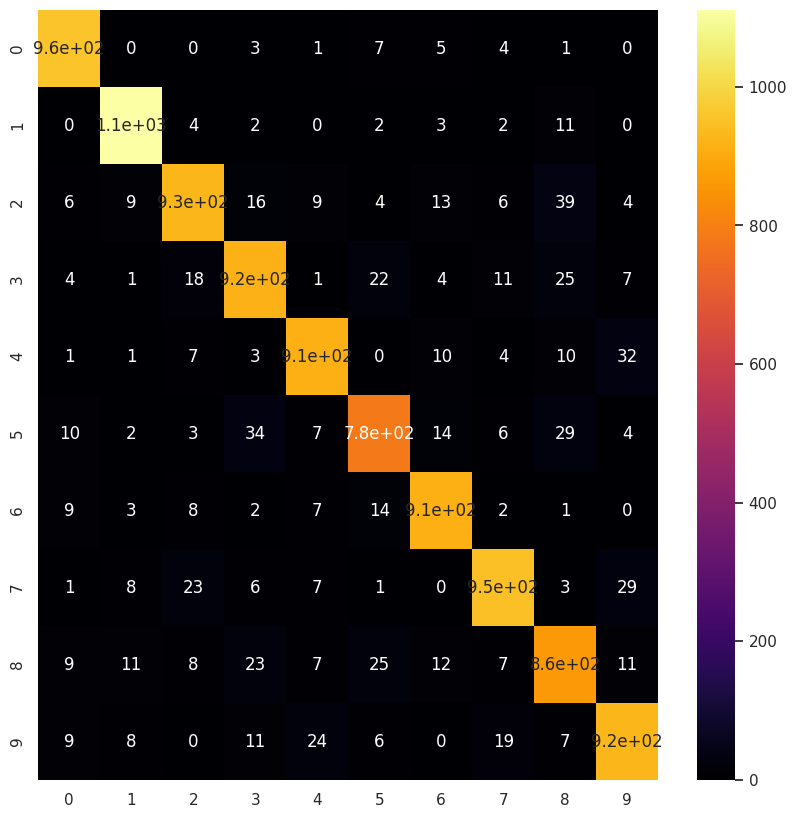

In [39]:
import seaborn as sns
sns.heatmap(confusion, 
            annot=True, 
            cmap='inferno')
confusion = confusion_matrix(y_test, y_pred_logreg)

sns.set(rc={'figure.figsize':(10, 10)}) 


In [40]:
from sklearn import svm

In [41]:
svc = svm.SVC(max_iter=100)
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print("svc", accuracy_svc)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


svc 0.9271


Shape of x_train (60000, 784)
Data type of x_train float64
Minimum Pixel value 0.0
maximum Pixel value 1.0


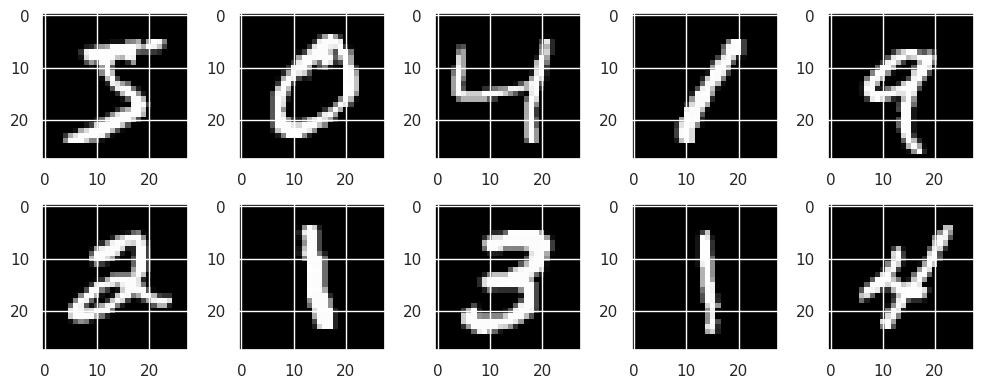

In [62]:
import numpy as np
from matplotlib import pyplot as plt
print("Shape of x_train", x_train.shape)
print("Data type of x_train", x_train.dtype)
print("Minimum Pixel value", np.min(x_train))
print("maximum Pixel value", np.max(x_train))

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")

plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [43]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,
    y_train,
    epochs=2,
    batch_size=32,
    validation_data=(x_test,y_test)
)

Epoch 1/2
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2345 - accuracy: 0.9321 - val_loss: 0.1265 - val_accuracy: 0.9594
Epoch 2/2
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0980 - accuracy: 0.9698 - val_loss: 0.0970 - val_accuracy: 0.9684


In [58]:
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report


In [61]:
test_loss, test_acc = model.evaluate(x_test, y_test)
y_pred_nn = model.predict(x_test)
f1_score_nn = f1_score(y_test,
                       np.argmax(y_pred_nn,axis=1),
                       average ='weighted'
                       )
precision = precision_score(y_test,
                                np.argmax(y_pred_nn,axis=1),
                       average ='weighted'
                            )
recall = recall_score(y_test, np.argmax(y_pred_nn, axis=1), average='weighted')
classification = classification_report(y_test, np.argmax(y_pred_nn, axis=1))
print("NN loss", test_loss)
print("Accuracy", test_acc)
print("nn f1 score", f1_score_nn)
print("nn precision", precision)
print("nn recall ", recall)
print("nn classification report", classification)

313/313 [==============================] - 1s 2ms/step
NN loss 0.09698797762393951
Accuracy 0.9684000015258789
nn f1 score 0.9683520536793531
nn precision 0.9685949868739463
nn recall  0.9684
nn classification report               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.97      0.97      0.97       982
           5       0.95      0.98      0.96       892
           6       0.96      0.98      0.97       958
           7       0.98      0.95      0.97      1028
           8       0.96      0.94      0.95       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

